# Assigment-2

Name - Rahul Tarak Balaji
Utorid - tarakbal
Student No - 1005934198

### Imports - All three questions

In [1]:
from scipy import stats
import numpy as np
import time
import random
import matplotlib.pyplot as plt
from statistics import mean 
%matplotlib inline

## Problem 1
Range of Cogs/yr = [1200,2400] , Number of Villagers = 12000, Tax of Pharaoh = 6%(1 +x/1000), Tax from you is 1.5% after tax of pharaoh, tax break from you is 08.% if they share lunar birthday month ± 1


The below solution makes one big **assumption, which is that it is equally as likely that you are born on any of the lunar months, this wouldn't be true in the real world.** Furthermore, as the solution uses random numbers only to eliminate some bias, however a more accurate solution would use a random distribution for each set instead of just picking a continuous group of 3000 people or continuous groups of 920 people

In [86]:
# Change selection of public workers from first 3000 to skip every 3rd or 4th person
# Same process selection of birthdays
def calculate_tax():
    # Creates values of earnings for each villager
    earnings = np.linspace(1200,2400,12000)
    # Choose a random set
    """Realising the problems asks not to use a random distribution to gain more accurarcy
    Hence the subset will be picked but skipping every nth person, for both public workers and tax exception due to birthdays.
    This n will be picked randomly."""
    randomSet = 4
    # Create empty array of undefined size
    earningsAfterPharaohTax = np.array([])
    # Assign array of public works, i.e, they get tax break from pharaoh
    publicWorkers = earnings[randomSet::randomSet]
    #print(len(publicWorkers))
    normalWorkers = np.delete(earnings,np.arange(randomSet, earnings.size, randomSet))
    #print((normalWorkers))
    pharoahTax = normalWorkers*(0.06*(1+(normalWorkers/1000)))
    #print(pharoahTax)
    earningsAfterPharaohTax = normalWorkers - pharoahTax
    earningsAfterPharaohTax = np.append(earningsAfterPharaohTax,publicWorkers)
    # Choose a random birth month, above note about randomising holds true here too
    myBirthday = 13
    # Create blank lists
    taxExemptWorkers = []
    defaultTaxedWorkers = []
    # Check if which tax bracket each person falls in and assign them to that list
    for i in range(12000):
        if (i % myBirthday == 0 or i % (myBirthday + 1) == 0 or i % (myBirthday-1) == 0):
            taxExemptWorkers.append(earningsAfterPharaohTax[i])
        else:
            defaultTaxedWorkers.append(earningsAfterPharaohTax[i])
    # Convert python lists to numpy arrays
    defaultTaxedWorkers = np.array(defaultTaxedWorkers)
    taxExemptWorkers = np.array(taxExemptWorkers)
    # Apply the tax rate for each person and find the tax
    taxCollected = np.append(defaultTaxedWorkers*0.015,taxExemptWorkers*0.007)
    return[pharoahTax,taxCollected]
print("Calculating tax for random birth month and random set of public worker\n")
taxes = calculate_tax()
# Display sum of all the tax collected by the Pharoah
print("Tax collected by Pharaoh -",np.sum(taxes[0]))
# Display the sum of all the tax collected by the Tax Collector
print("Tax collected by Tax Collector(Me) -",np.sum(taxes[1]))

Calculating tax for random birth month and random set of public worker

Tax collected by Pharaoh - 2786693.4094506376
Tax collected by Tax Collector(Me) - 250748.95496361164


By choosing the randomize which set of citizens are public workers and which set of citizens have the same birth month ± 1 as me, there will be a slight variation in answer each time the program is run, however if we run it many times and average the values we will get a more accurate answer

## Problem 2

In [2]:
def loanLeft(currentLoan,interestAmount,payment):
    """
    Returns remaining loan after current payment and interest
    """
    newLoanAmount = currentLoan - (payment -interestAmount)
    return newLoanAmount
def loan(interestRate):
    """
    Returns loafLeft from start to end as array of values from a given interest rates
    """
    #Constants
    principal = 36000.0
    firstPayment = 300 
    secondPayment = 380
    
    loanAmount = principal
    # Using first interest rate
    interest = (interestRate[0]/100)/12 
    
    interestAmount = principal*(interest) 
    yValues = []
    yValues.append(loanAmount)
    # Calculate loan for first 24 months or 2 years at first payment rate
    for x in range(1,24):
        yValues.append(loanLeft(yValues[x-1],interestAmount,firstPayment))
    # Same Regardless of Case
    loanAmount = loanLeft(yValues[23],interestAmount,secondPayment)
    yValues.append(loanAmount)
    x = 25
    # Caculate remainder of loan after first 24 months at second payment rate
    while loanAmount > 0:
        if x > 24:
            # Change interest rate to second interest rate
            interest = (interestRate[1]/100)/12
            interestAmount = principal*(interest)
        elif x > 48:
            # Change interest rate to third interest rate
            interest = (interestRate[2]/100)/12
            interestAmount = principal*(interest)
        loanAmount = loanLeft(yValues[x-1],interestAmount,secondPayment)
        x += 1
        yValues.append(loanAmount)
    return yValues
yValuesCase1 = loan([4.2,4.2,4.2]) # Constant Interest Rate
print(len(yValuesCase1)," - Number of Months required to pay back the loan")
yValuesCase2 = loan([4.2,5.2,5.7]) # Interest Rate changes every 2 years   

150  - Number of Months required to pay back the loan


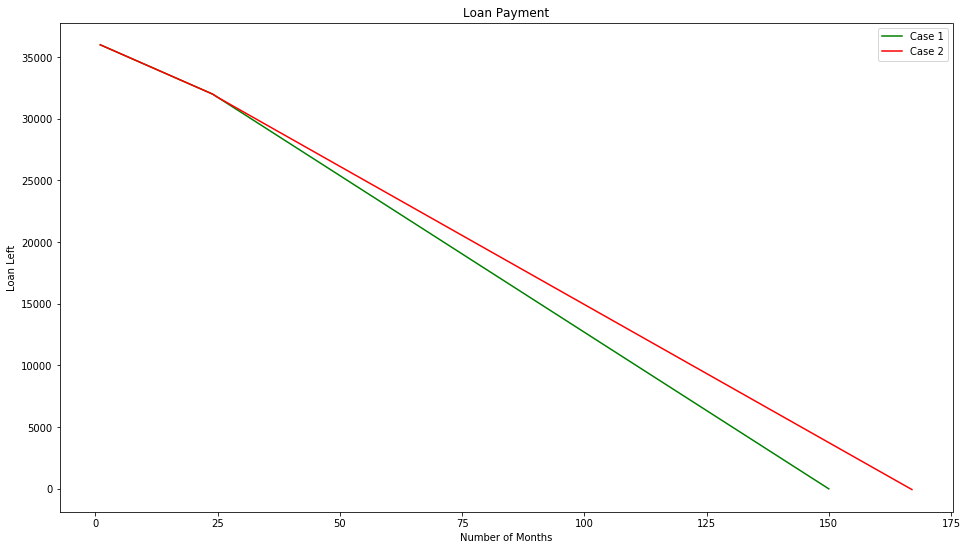

In [52]:
xValuesCase1 = np.arange(1,len(yValuesCase1)+1)
xValuesCase2 = np.arange(1,len(yValuesCase2)+1)
plt.figure(figsize=(16,9)) # Setting Larger Graph Size
plt.plot(xValuesCase1,yValuesCase1,"green",label = "Case 1") # Creating plots
plt.plot(xValuesCase2,yValuesCase2,"red",label = "Case 2") # Creating plots
plt.title("Loan Payment")
plt.xlabel("Number of Months")
plt.ylabel("Loan Left")
axes = plt.gca()
axes.legend()
axes.set_facecolor('xkcd:white')
plt.show()

## Problem 3

Last Digit of Student id is 8 for me hence D = 8

$$ f(x,y) = 1 + 0.1\times8\times x - 4\times\sqrt{2} \times x\times y^{(-x-y\times y)} , x \in [0,3] , y \in [0,3]$$

In [3]:
startTime = time.time()
# Creating Large Mesh of X and Y Values
x = np.linspace(0,3,1000)
y = np.linspace(0,3,1000)
#Creating matrix of f values
f = 1 + 0.1*8*x - 4*np.sqrt(2)*x*y**(-x-y*y)
# Method 1
minima = 10000
xMinima,yMinima = 0,0
# Manually going through the entire mesh to find the smallest value of f
for i in range(1000):
    if minima > f[i]:
        minima = min(f[i],minima)
        xMinima,yMinima = x[i],y[i]
print("Methond 1 \n",minima,"- Local Minima of f\n",xMinima,"- X Value of Minima",yMinima,"- Y Value of Minima\n",time.time() -startTime,"- Execution Time\n\n")

print("Method 2, Finding Gradient\n")
startTime = time.time()
# Differiating once, to find gradient near zero,
gradient = np.gradient(f) 
 # Differiating twice, to prove that gradient is postive and hence minima not maxima
secondDerravative = np.gradient(f,2)
# For every gradient, checking if secondDerravative is postive and if it is minima gradient
gradientOfMinima = gradient[np.where(secondDerravative > 0)]
gradientOfMinima = np.amin(gradientOfMinima)
print(gradientOfMinima, "- First Derravative of Minima")
print(secondDerravative[np.where(gradient == gradientOfMinima)][0], "- Second Derravative of Minima")
print( time.time() -startTime,"- Execution Time")
print(np.amin(f),"- Local Minima of f, using numpy amin function")
print(f[np.where(gradient == gradientOfMinima)][0], "- Calculated Minima of f")
print(x[np.where(gradient == gradientOfMinima)][0],"- X Value of Minima")
print(y[np.where(gradient == gradientOfMinima)][0],"- Y Value of Minima")

Methond 1 
 -4.605999599982886 - Local Minima of f
 0.7807807807807807 - X Value of Minima 0.7807807807807807 - Y Value of Minima
 0.002111196517944336 - Execution Time


Method 2, Finding Gradient

0.0002012737085297367 - First Derravative of Minima
0.00010063685426486835 - Second Derravative of Minima
0.0022287368774414062 - Execution Time
-4.605999599982886 - Local Minima of f, using numpy amin function
-4.605950162921484 - Calculated Minima of f
0.7837837837837838 - X Value of Minima
0.7837837837837838 - Y Value of Minima


## Problem 4


In [2]:
n = 100000000 # Arbitary Large Value
# Create random arrays of numbers
t1 = np.random.rand(n)
t2 = np.random.rand(n)
# Distance between two points
distance = np.absolute(t1 - t2)
# Check if distance is less than 0.5
lessThanHalf = np.where(distance < 1/2)[0]
# Find probability that distance is less than 0.5
prob = len(lessThanHalf)/len(t1)
print(len(t1),len(lessThanHalf),prob,"- N, Less than 0.5 values, Probability\n")
print("Probability -",prob)
# Find variance of distance between two points
variance = np.var(distance) 
# Standard Deviation of the distance
sigma = variance**2
# Standard Deviation of the average distance
sigm_a = (variance/n)**1/2
print("\n",np.mean(distance),"+-",sigm_a,";",sigma, "- Mean and Standard Deviation")

100000000 74999779 0.74999779 - N, Less than 0.5 values, Probability

Probability - 0.74999779

 0.33332397721128343 +- 2.7775344993937186e-10 ; 0.003085879158128926 - Mean and Standard Deviation
